In [ ]:
import numpy as np
import pandas as pd
import pylab as plt


# set the global size of matplolib figures
plt.rc("figure", figsize=(10,5))

#set the size of my subplots
size_subplots = (10,10)

#size of histogram bins
bin_size = 10

In [ ]:
tit = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
#check the top five rows and columns of my dataset
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
tit.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


##**Viewing information from dataset**

In [ ]:
tit.shape

(891, 12)

In [ ]:
tit.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#helping us to find the total number of null values in eaxh column
tit.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##**Visualization**

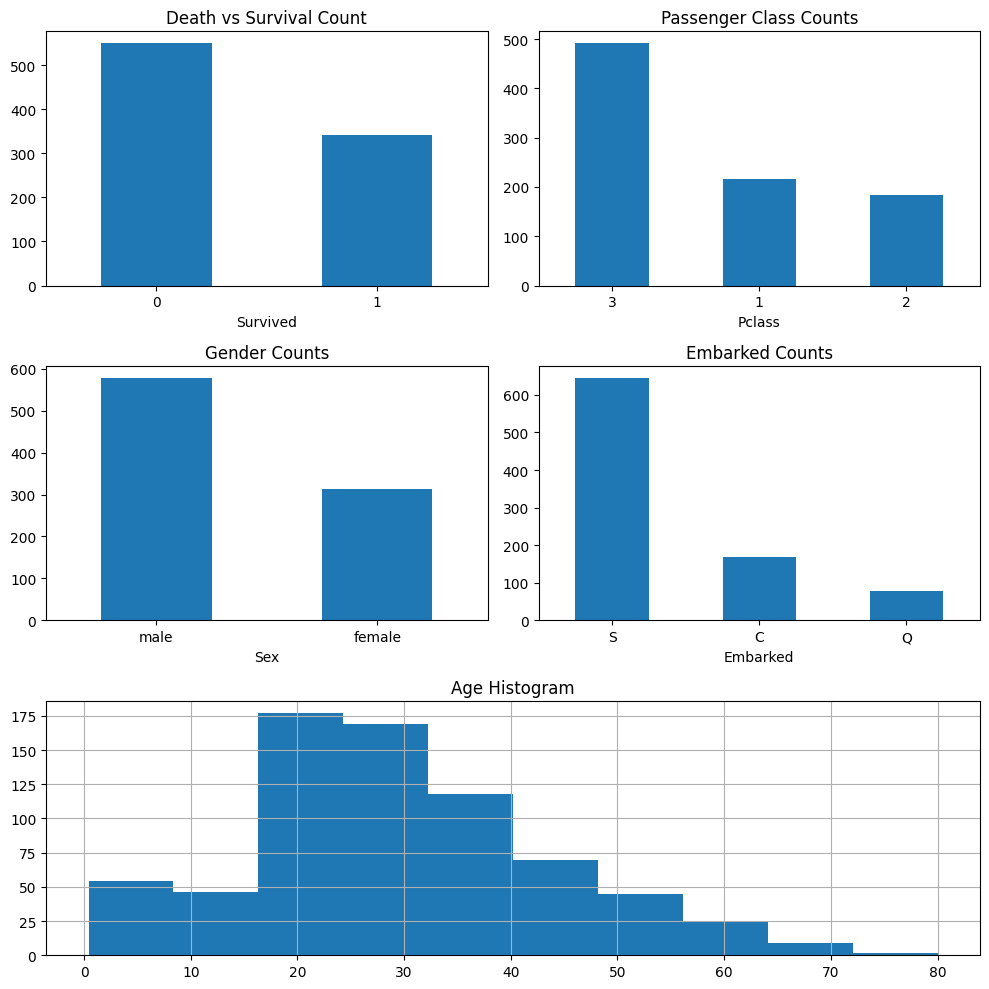

In [ ]:


fig = plt.figure(figsize=size_subplots)
fig_dims = (3, 2)

# First subplot
plt.subplot2grid(fig_dims, (0, 0))
tit["Survived"].value_counts().plot(kind="bar", title="Death vs Survival Count")
plt.xticks(rotation=0)

# Second subplot
plt.subplot2grid(fig_dims, (0, 1))
tit["Pclass"].value_counts().plot(kind="bar", title="Passenger Class Counts")
plt.xticks(rotation=0)

# Third subplot
plt.subplot2grid(fig_dims, (1, 0))
tit["Sex"].value_counts().plot(kind="bar", title="Gender Counts")
plt.xticks(rotation=0)

# Fourth subplot
plt.subplot2grid(fig_dims, (1, 1))
tit["Embarked"].value_counts().plot(kind="bar", title="Embarked Counts")
plt.xticks(rotation=0)

# Fifth subplot
plt.subplot2grid(fig_dims, (2, 0), colspan=2)  # Span across two columns
tit["Age"].hist()
plt.title("Age Histogram")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


##Feature: Passenger class


In [ ]:
pclass_xt = pd.crosstab(tit["Pclass"], tit["Survived"])


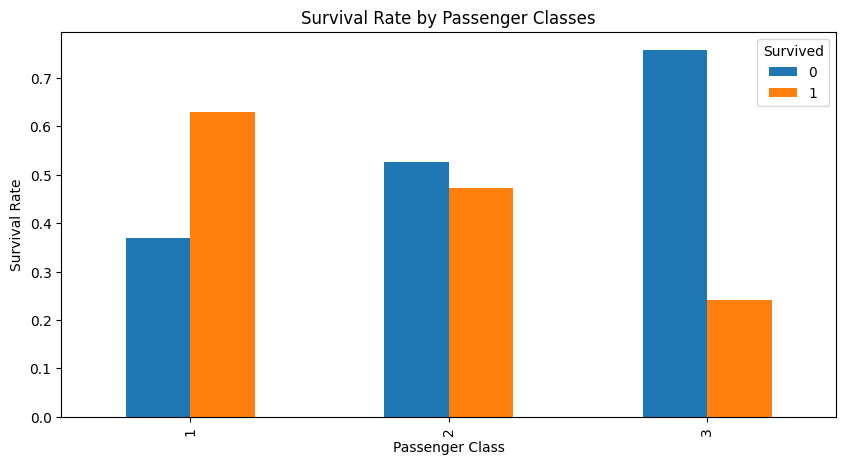

In [ ]:

# Create the crosstab
pclass_xt = pd.crosstab(tit['Pclass'], tit['Survived'])

# Convert counts to percentage
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

# Plot
pclass_xt_pct.plot(kind="bar", stacked=False, title="Survival Rate by Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


##Feature: Gender


In [ ]:
sexes = sorted(tit["Sex"].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

In [ ]:
tit["Sex Val"] = tit["Sex"].map(genders_mapping).astype(int)
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


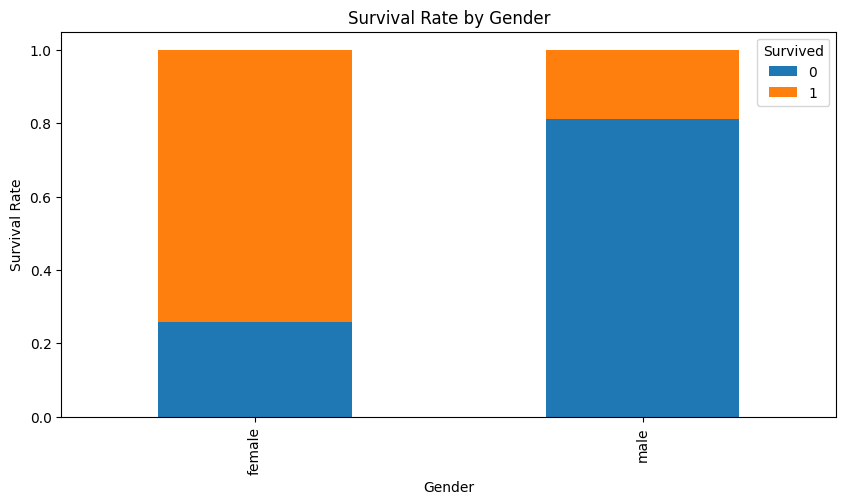

In [ ]:
gender_val_xt = pd.crosstab(tit["Sex"], tit["Survived"])
gender_val_xt_pct = gender_val_xt.div(gender_val_xt.sum(1).astype(float), axis=0)
gender_val_xt_pct.plot(kind="bar", stacked=True, title="Survival Rate by Gender")

plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()


In [ ]:
#unique values of p class
passenger_class = sorted(tit["Pclass"].unique())
for p_class in passenger_class:
    print("M-", p_class, len(tit[(tit["Sex"] == "male") & (tit["Pclass"] == p_class)]))
    print("F-", p_class, len(tit[(tit["Sex"] == "female") & (tit["Pclass"] == p_class)]))


M- 1 122
F- 1 94
M- 2 108
F- 2 76
M- 3 347
F- 3 144


Text(0, 0.5, 'Survival class')

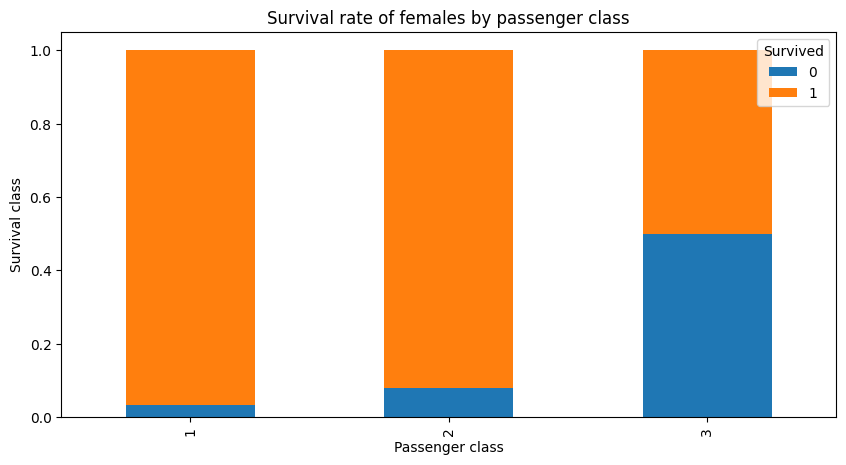

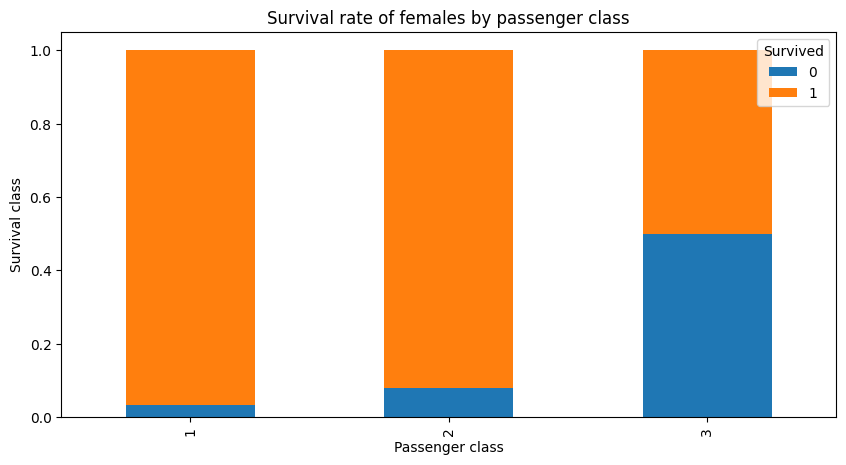

In [ ]:
females_df = tit[tit["Sex"] == "female"]
females_xt = pd.crosstab(females_df["Pclass"], tit["Survived"])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind = "bar",
                    stacked = "True",
                    title = "Survival rate of females by passenger class")
plt.xlabel("Passenger class")
plt.ylabel("Survival class")

#---------------------------------------------------------------------------------

males_df = tit[tit["Sex"] == "female"]
males_xt = pd.crosstab(males_df["Pclass"], tit["Survived"])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind = "bar",
                    stacked = "False",
                    title = "Survival rate of females by passenger class")
plt.xlabel("Passenger class")
plt.ylabel("Survival class")

